# Selección de características

En base a las conclusiónes de la tarea 3, se incluyeron nuevas variables que pueden ayudarnos a poder predecir el tipo de cambio:

1. Producto Interno Bruto (PIB)
    - Frecuencia: Cierre de trismestere.
2. Indice de Desempleo 
    - Frecuencia: Mensual.
3. Índice Nacional de Precios al Consumidor (INPC)
    - Frecuencia: Mensual.
4. Indicador global de la actividad económica (IGAE)
    - Frecuencia: Mensual
5. Indicador de Pedidos Manufactureros
    - Frecuencia: Mensual

Los indicadores Indice de Desempleo, Índice Nacional de Precios al Consumidor (INPC), Indicador global de la actividad económica (IGAE) y Indicador de Pedidos Manufactureros se encuentran de manera mensual y el Producto Interno Bruto (PIB) de manera trimestral.

El tipo de cambio USD/MXN se tomara de la pagina oficial del Banco de México (BANXICO). Dado que el tipo de cambio esta en frecuencia diaria, se tendra que interpolar para aquellos indices que se encuentren en una frecuencia diferente.

Importación de las bases de datos

In [1]:
# Leectura
import pandas as pd
import numpy as np

#Archivo del tipo de cambio
FIX = pd.read_excel(r'C:\Users\tmoli\OneDrive\Documentos\Angel\Maestria\Materias\3. Aprendizaje Automatico\BD\TipoCambio.xls')

#Archivo del Indice Nacional de Precios al Consumidor INPC
INPC = pd.read_excel(r'C:\Users\tmoli\OneDrive\Documentos\Angel\Maestria\Materias\3. Aprendizaje Automatico\BD\INPC.xls')

#Archivo del Indicede Desempleo
Indice_Desempleo = pd.read_excel(r'C:\Users\tmoli\OneDrive\Documentos\Angel\Maestria\Materias\3. Aprendizaje Automatico\BD\Indicede_Desempleo.xls')

#Archivo del Indicador de Pedidos Manufactureros
Indice_Pedidos_Manufactureros = pd.read_excel(r'C:\Users\tmoli\OneDrive\Documentos\Angel\Maestria\Materias\3. Aprendizaje Automatico\BD\Indicador_Pedidos_Manufactureros.xls')

#Archivo del Indicador global de la actividad económica (IGAE)
IGAE = pd.read_excel(r'C:\Users\tmoli\OneDrive\Documentos\Angel\Maestria\Materias\3. Aprendizaje Automatico\BD\IGAE.xlsx')

#Archivo del PIB
PIB = pd.read_excel(r'C:\Users\tmoli\OneDrive\Documentos\Angel\Maestria\Materias\3. Aprendizaje Automatico\BD\PIB.xlsx')

Interpolación

In [2]:
#Fecha del tipo de cambio
FIX['Fecha'] = pd.to_datetime(FIX['Fecha'], format='%d/%m/%Y')

#Fecha PIB
PIB['Periodo'] = pd.to_datetime(PIB['Periodo'], format='%Y-%m-%d')

#Fecha INPC
INPC['Periodos'] = pd.to_datetime(INPC['Periodos'], format='%Y/%m/%d')

#Fecha Indice Desempleo
Indice_Desempleo['Periodos'] = pd.to_datetime(Indice_Desempleo['Periodos'], format='%Y/%m/%d')

#Fecha Indice Pedidos Manufactureros
Indice_Pedidos_Manufactureros['Periodos'] = pd.to_datetime(Indice_Pedidos_Manufactureros['Periodos'], format='%Y/%m/%d')

#Fecha IGAE
IGAE['Periodo'] = pd.to_datetime(IGAE['Periodo'], format='%Y/%m/%d')

In [3]:
#Interpolación de datos para el PIB
PIB_D = np.interp(FIX['Fecha'], PIB['Periodo'], PIB['PIB'])

#Interpolación de datos para el INPC
INPC_D = np.interp(FIX['Fecha'], INPC['Periodos'], INPC['INPC'])

#Interpolación de datos para el Indice de Desempleo
IndiceDesempleo_D = np.interp(FIX['Fecha'], Indice_Desempleo['Periodos'], Indice_Desempleo['IndiceDesempleo'])
IndiceDesempleo_TendenciaCiclo_D = np.interp(FIX['Fecha'], Indice_Desempleo['Periodos'], Indice_Desempleo['IndiceDesempleo_TendenciaCiclo'])

#Interpolación de datos para el Indice de Pedidos Manufactureros
Indice_Pedidos_Manufactureros_D = np.interp(FIX['Fecha'], Indice_Pedidos_Manufactureros['Periodos'], Indice_Pedidos_Manufactureros['IndicePedidosManufactureros'])
IndicePedidosManufactureros_TendenciaCiclo_D = np.interp(FIX['Fecha'], Indice_Pedidos_Manufactureros['Periodos'], Indice_Pedidos_Manufactureros['IndicePedidosManufactureros_TendenciaCiclo'])

#Interpolación de datos para el IGAE
IGAE_D = np.interp(FIX['Fecha'], IGAE['Periodo'], IGAE['IGAE'])
IGAE_ActividadesPrimarias_D = np.interp(FIX['Fecha'], IGAE['Periodo'], IGAE['IGAE_ActividadesPrimarias'])
IGAE_ActividadesSecundarias_D = np.interp(FIX['Fecha'], IGAE['Periodo'], IGAE['IGAE_ActividadesSecundarias'])
IGAE_ActividadesTerciarias_D = np.interp(FIX['Fecha'], IGAE['Periodo'], IGAE['IGAE_ActividadesTerciarias'])

In [4]:
df_USDMXN = pd.DataFrame({'Periodo': FIX['Fecha'], 
                          'TipoCambio': FIX['FIX'], 
                          'PIB': PIB_D,
                          'INPC': INPC_D,
                          'IndiceDesempleo': IndiceDesempleo_D,
                          #'IndiceDesempleo_Tendencia': IndiceDesempleo_D,
                          'Indice_Pedidos_Manufactureros': Indice_Pedidos_Manufactureros_D,
                          #'IndicePedidosManufactureros_TendenciaCiclo': IndicePedidosManufactureros_TendenciaCiclo_D,
                          'IGAE': IGAE_D})

#'IGAE_ActividadesPrimarias': IGAE_ActividadesPrimarias_D,
#                          'IGAE_ActividadesSecundarias': IGAE_ActividadesSecundarias_D,
#                          'IGAE_ActividadesTerciarias': IGAE_ActividadesTerciarias_D

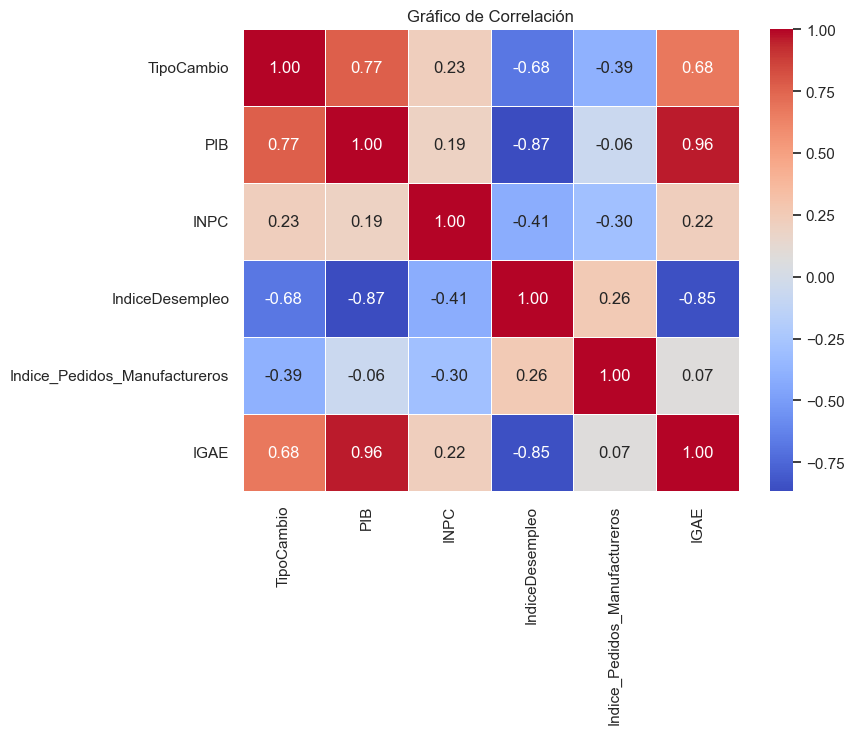

In [5]:
#Grafico de correlacion
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(style="white")  # Configuración de estilo
plt.figure(figsize=(8, 6))  # Tamaño de la figura
sns.heatmap(df_USDMXN.corr(), annot=True, cmap="coolwarm", fmt=".2f", linewidths=.5)
plt.title("Gráfico de Correlación")
plt.show()

### Método de filtro mediante el uso de SelectKBest

In [6]:
# Importar librerias
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

# Selecciona las variables
X = df_USDMXN[['PIB', 'INPC', 'IndiceDesempleo','Indice_Pedidos_Manufactureros','IGAE']]

y = df_USDMXN['TipoCambio']

# Dividir los datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# SelectKBest con la prueba estadística f_regression
k_best = SelectKBest(score_func=f_regression, k='all')
X_train_kbest = k_best.fit_transform(X_train, y_train)

# Obtener puntuaciones y las variables seleccionadas
scores = pd.DataFrame({'Variable': X.columns, 'Score': k_best.scores_})
selected_features = X.columns[k_best.get_support()]

# Mostrar las puntuaciones y las variables seleccionadas
print("Puntuaciones de las variables:")
print(scores)
print("\nVariables seleccionadas:")
print(selected_features)

Puntuaciones de las variables:
                        Variable        Score
0                            PIB  4531.201210
1                           INPC   179.315019
2                IndiceDesempleo  2749.148576
3  Indice_Pedidos_Manufactureros   576.265679
4                           IGAE  2703.948971

Variables seleccionadas:
Index(['PIB', 'INPC', 'IndiceDesempleo', 'Indice_Pedidos_Manufactureros',
       'IGAE'],
      dtype='object')


In [7]:
#Ahora mostramos cuáles se quedaron
X.iloc[:,k_best.get_support()]

,PIB,INPC,IndiceDesempleo,Indice_Pedidos_Manufactureros,IGAE
0,1.538191e+07,5.264194,3.620167,53.582910,84.903893
1,1.537749e+07,5.268387,3.627607,53.532293,84.901218
2,1.537307e+07,5.272581,3.635048,53.481676,84.898542
3,1.536865e+07,5.276774,3.642488,53.431059,84.895866
4,1.535538e+07,5.289355,3.664808,53.279207,84.887839
...,...,...,...,...,...
3857,1.841953e+07,4.296774,2.702479,49.063741,104.023722
3858,1.841953e+07,4.290645,2.702479,48.973142,104.023722
3859,1.841953e+07,4.284516,2.702479,48.882543,104.023722
3860,1.841953e+07,4.266129,2.702479,48.610747,104.023722


### Multicolinealidad
Validando multicolinealidad.

In [14]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

df_vif = pd.DataFrame()
df_vif["Variable"] = X.columns
df_vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
df_vif.sort_values('VIF', ascending = False, inplace = True)
df_vif

,Variable,VIF
4,IGAE,3913.288157
0,PIB,2437.566794
3,Indice_Pedidos_Manufactureros,1034.324521
2,IndiceDesempleo,104.069699
1,INPC,11.387161


### ANOVA de valor F

Revisando la linealidad de las variables.

In [16]:
f_value = f_regression(X, y)
pass_test = []
not_pass_test = []
alpha = 0.05
for i in range(len(f_value[1])):
    print(X.columns[i], f_value[1][i])
    if f_value[1][i] < alpha:
        pass_test.append(X.columns[i])
    else:
        not_pass_test.append(X.columns[i]) 

PIB 0.0
INPC 9.595460770729782e-46
IndiceDesempleo 0.0
Indice_Pedidos_Manufactureros 4.389310312960195e-141
IGAE 0.0


In [17]:
results = pd.DataFrame(f_value[0], index = X.columns)
results.columns = ['f_value']
results.sort_values('f_value', inplace = True, ascending = False)
results

,f_value
PIB,5514.847426
IndiceDesempleo,3405.283173
IGAE,3275.612094
Indice_Pedidos_Manufactureros,695.568595
INPC,206.929871


### Valor R

In [30]:
from sklearn.feature_selection import r_regression

r_value = r_regression(X, y)
r_value

array([ 0.76698107,  0.2255684 , -0.6846212 , -0.39074973,  0.67753326])

### Conclusión

Dado al f_value; el PIB, el índice de Desempleo y el IGAE son las variables que más afectan linealmente al precio del peso-dólar. Pero vemos que las 5 variables seleccionadas presentan un alta multicolinealidad así como una correlación elevada, por lo tanto, sugiero realizar modelo diferente a una regresión lineal convencional para lograr predecir el precio del dólar.